## Variable Conventions
<code>
df_final = final dataframe
df = original dataframe
df_five = 5 variables # Use as default unless Peter's analysis suggest otherwise
df_seven = 7 variables
<code>

# Lab 2: Network Intrusion Detection

In [2]:
# Imports
from matplotlib import pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics as mt
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold

from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import RandomizedPCA 
from sklearn.decomposition import PCA
from sklearn.lda import LDA

from sklearn.pipeline import Pipeline
from sklearn import metrics as mt

import seaborn as sns
import pandas as pd
import numpy as np


%matplotlib inline

C:\Anaconda\envs\ipykernel_py2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\envs\ipykernel_py2\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Anaconda\envs\ipykernel_py2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# Load UNSW_NB15 into a Pandas dataframe
df = pd.read_csv('UNSW_NB15_training_set.csv')

# Remove the four duplicate rows with invalid value for is_ftp_login
df = df[df.is_ftp_login != 2]

# original df_five from minilab that were selected based off results from correlation matrix as most important features.
df_five = df[['sttl','ct_dst_sport_ltm', 'ct_src_dport_ltm', 'swin', 'dwin', 'label' ]] # 
df_five.info()
df_five.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Data columns (total 6 columns):
sttl                82328 non-null int64
ct_dst_sport_ltm    82328 non-null int64
ct_src_dport_ltm    82328 non-null int64
swin                82328 non-null int64
dwin                82328 non-null int64
label               82328 non-null int64
dtypes: int64(6)
memory usage: 4.4 MB


,sttl,ct_dst_sport_ltm,ct_src_dport_ltm,swin,dwin,label
count,82328.000000,82328.000000,82328.000000,82328.000000,82328.000000,82328.000000
mean,180.973448,3.663092,4.929040,133.453175,128.280464,0.550578
std,101.512436,5.915518,8.389724,127.357276,127.491408,0.497438
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,254.000000,1.000000,1.000000,255.000000,255.000000,1.000000
75%,254.000000,3.000000,4.000000,255.000000,255.000000,1.000000
max,255.000000,38.000000,59.000000,255.000000,255.000000,1.000000


In [11]:
# we want to predict the X and y data as follows for 5 feature iteration: 
if 'label' in df_five:
    y = df_five['label'].values # get the labels we want
    del df_five['label'] # get rid of the class label
    X = df_five.values # use everything else to predict!

    # X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    # have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_folds = 10
cv_object = StratifiedKFold(y, num_folds)
                         
print cv_object

sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 ..., 0 0 0], n_folds=10, shuffle=False, random_state=None)


In [4]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
#was having issue loading the data as exmaple specifies with .data/.target,
#instead tried to load data like Peter had previously done, by assigning values and then eliminating the 'label' category.

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
### from scipy import interp

# Data to play with
if 'label' in df_five:
    y = df_five['label'].values # get the labels we want
    del df_five['label'] # get rid of the class label
    X = df_five.values # use everything else to predict!

# Binarize the output
### y = label_binarize(y, classes=[0, 1, 2])
### n_classes = y.shape[1]

# Add noisy features to make the problem harder
### random_state = np.random.RandomState(0)
### n_samples, n_features = X.shape
### X = np.c_[X, random_state.randn(n_samples, 20 * n_features)]

# shuffle and split training and test sets
### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
###                                                     random_state=0)

# Learn to predict each class against the other
### classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)
for train_indices, test_indices in cv_object:
    X_train = X[train_indices]
    y_train = y[train_indices]
   
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test)
    
    # train the reusable logisitc regression model on the training data
###    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
accuracies

array([ 0.87210009,  0.8908053 ,  0.8516944 ,  0.99186202,  0.93975465,
        0.54706668,  0.65188874,  0.60974129,  0.64006317,  0.63070943])

In [8]:
# Compute ROC curve and ROC area for each class
### fpr = dict()
### tpr = dict()
### roc_auc = dict()
### for i in range(len(y)):
###     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
fpr, tpr, _ = roc_curve(y_test, y_hat)

### roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
### fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
### roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

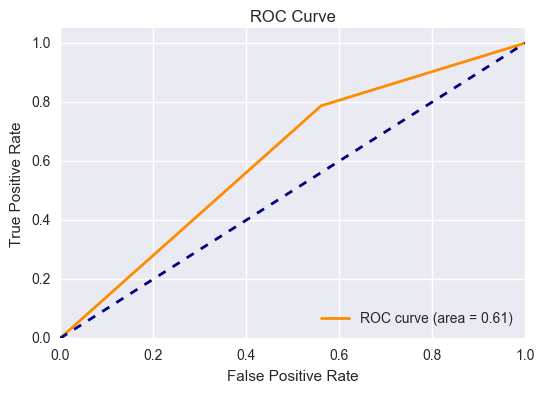

In [10]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Data Preparation:

* Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

In [ ]:
# Peter
# df_five and df_seven based of describe does not require one-hot encoding and is ready for modeling
# First lets redo accuracy results for logistic regression on original 5 features selected based on correlation matrix from
# from lab 1 for accuracy comparision with additional 2 features suggested by grader using logistic regression model
# with 80/20 shuffle split cross validation to determine if we should proceed with original 5 or add additional two features for
# 


In [4]:
# we want to predict the X and y data as follows for 5 feature iteration: 
if 'label' in df_five:
    y = df_five['label'].values # get the labels we want
    del df_five['label'] # get rid of the class label
    X = df_five.values # use everything else to predict!

    # X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    # have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print cv_object

ShuffleSplit(82328, n_iter=3, test_size=0.2, random_state=None)


In [7]:
# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object
for train_indices, test_indices in cv_object:
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test)

accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)
print "Average Accuracy (5 feature set) across " + str(num_cv_iterations) + " shuffle split cross validation iterations = " + str(np.average(accuracies))

[ 0.76867485  0.76758168  0.76673145]
Average Accuracy (5 feature set) across 3 shuffle split cross validation iterations = 0.767662658407


In [10]:
# we want to predict the X and y data as follows for 7 feature iteration: 
if 'label' in df_seven:
    y = df_seven['label'].values # get the labels we want
    del df_seven['label'] # get rid of the class label
    X = df_seven.values # use everything else to predict!

    # X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    # have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print cv_object

ShuffleSplit(82328, n_iter=3, test_size=0.2, random_state=None)


In [24]:
# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object
for train_indices, test_indices in cv_object:
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test)

accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)
print "Average Accuracy (7 feature set) across " + str(num_cv_iterations) + " shuffle split cross validation iterations = " + str(np.average(accuracies))

[ 0.77280457  0.77043605  0.77620551]
Average Accuracy (7 feature set) across 3 shuffle split cross validation iterations = 0.773148710474


Based on the results there was negligible increase in accuracy with respect to including the additional 2 features
requested by the grader in terms of explaining the data.  Hence we we stick with the original 5 based on correlation results
from mini lab.

* Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

## Modeling and Evaluation:
* Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

In [ ]:
# Randy

*  Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

In [ ]:
# Ravi

*  Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms! 

*  Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

In [ ]:
# Team

* Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation. 

In [ ]:
# Team or TBD

* Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

In [ ]:
# Team or TBD

## Deployment:
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

In [ ]:
# Daniel

## Exceptional Work:

You have free reign to provide additional analyses

• One idea: grid search parameters in a parallelized fashion and visualize the
performances across attributes. Which parameters are most significant for making a
good model for each classification algorithm?

In [ ]:
# Randy and team